<a href="https://colab.research.google.com/github/ridvanyigit/My-Projects/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [306]:
# Import necessary libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_samples

In [307]:
warnings.filterwarnings('ignore')

In [308]:
df= pd.read_csv('Train.csv')
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [310]:
df.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76


In [311]:
# Copy the dataset and drop the 'ID' column
dataset = df.copy()
dataset.drop('ID', axis=1, inplace=True)
dataset.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [312]:
dataset['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [313]:
dataset['Spending_Score'].unique()

array(['Low', 'Average', 'High'], dtype=object)

In [314]:
dataset['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', nan, 'Cat_5'],
      dtype=object)

In [315]:
dataset.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [316]:
dataset.isnull().sum()

,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76
Segmentation,0


In [317]:
columns_to_fill = ['Profession',
                   'Var_1',
                   'Segmentation',
                   'Spending_Score',
                   'Work_Experience',
                   'Family_Size',
                   'Ever_Married',
                   'Graduated'
                  ]

for column in columns_to_fill:
    mode_value = dataset[column].mode()[0]
    dataset[column].fillna(mode_value, inplace=True)

In [318]:
dataset.isnull().sum()

,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0
Segmentation,0


In [319]:
# Encode categorical variables using LabelEncoder
le = LabelEncoder()

for col in dataset.columns:
    if dataset[col].dtype == 'object':
        dataset.loc[:, col] = le.fit_transform(dataset[col].astype(str))

In [281]:
dataset.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1.0,2,4.0,3,3
1,0,1,38,1,2,1.0,0,3.0,3,0
2,0,1,67,1,2,1.0,2,1.0,5,1
3,1,1,67,1,7,0.0,1,2.0,5,1
4,0,1,40,1,3,1.0,1,6.0,5,0


In [320]:
# Define features and target variable
y = dataset['Segmentation']
X = dataset.drop(columns=['Segmentation'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [323]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [324]:
y

,Segmentation
0,3
1,0
2,1
3,1
4,0
...,...
8063,3
8064,3
8065,3
8066,1


In [325]:
X

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,0,22,0,5,1.0,2,4.0,3
1,0,1,38,1,2,1.0,0,3.0,3
2,0,1,67,1,2,1.0,2,1.0,5
3,1,1,67,1,7,0.0,1,2.0,5
4,0,1,40,1,3,1.0,1,6.0,5
...,...,...,...,...,...,...,...,...,...
8063,1,0,22,0,0,0.0,2,7.0,0
8064,1,0,35,0,4,3.0,2,4.0,3
8065,0,0,33,1,5,1.0,2,1.0,5
8066,0,0,27,1,5,1.0,2,4.0,5


In [326]:
X_scaled

array([[ 0.90916397, -1.2066533 , -1.28462344, ...,  0.754462  ,
         0.78553624, -0.80837004],
       [-1.0999116 ,  0.82873846, -0.32715082, ..., -1.60301259,
         0.1227349 , -0.80837004],
       [-1.0999116 ,  0.82873846,  1.40826831, ...,  0.754462  ,
        -1.20286777,  0.60071054],
       ...,
       [-1.0999116 , -1.2066533 , -0.62636101, ...,  0.754462  ,
        -1.20286777,  0.60071054],
       [-1.0999116 , -1.2066533 , -0.98541324, ...,  0.754462  ,
         0.78553624,  0.60071054],
       [ 0.90916397,  0.82873846, -0.38699286, ..., -1.60301259,
         0.1227349 , -0.80837004]])

In [327]:
# Initialize the inertia list
inertia = []

# Compute inertia for different numbers of clusters
for n_clusters in range(1, 10):
    kmeans = KMeans(
        n_clusters=n_clusters,
        init= 'k-means++',
        n_init= 'auto',
        random_state= 42
    )
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

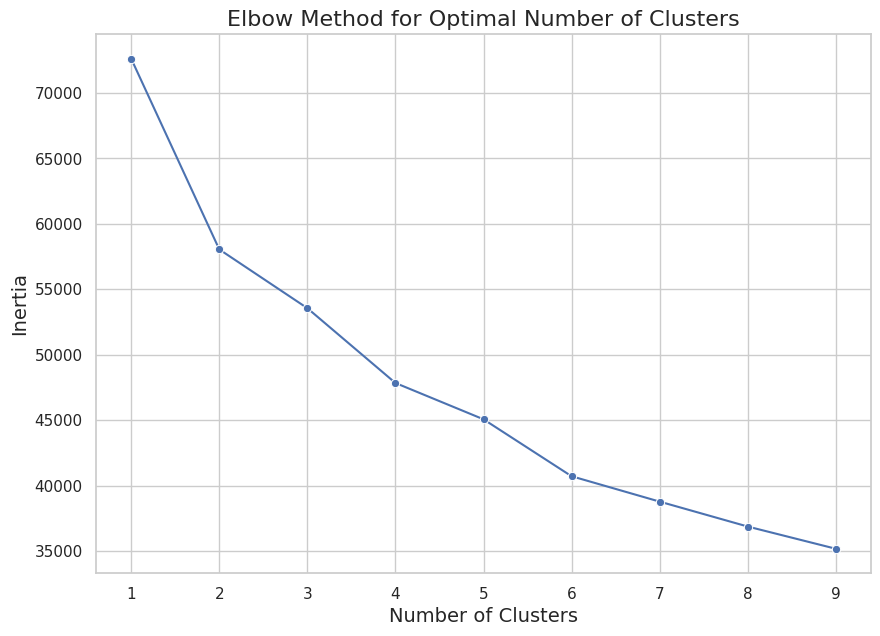

In [328]:
# Plot the Elbow Method
sns.set(style= "whitegrid")
plt.figure(figsize= (10, 7))
sns.lineplot(x= range(1, 10), y= inertia, marker= 'o', linestyle= '-', color= 'b')
plt.xlabel('Number of Clusters', fontsize= 14)
plt.ylabel('Inertia', fontsize=14)
plt.title('Elbow Method for Optimal Number of Clusters', fontsize= 16)
plt.xticks(np.arange(1, 10, 1))
plt.show()

In [329]:
silhouette_scores = []

# Compute silhouette scores for different numbers of clusters
for n_clusters in range(2, 10):
    agglomerative = AgglomerativeClustering(n_clusters= n_clusters)
    cluster_labels = agglomerative.fit_predict(X_scaled)

    # Calculate silhouette score
    if len(set(cluster_labels)) > 1:
        score = silhouette_score(X_scaled, cluster_labels)
    else:
        score = -1

    silhouette_scores.append(score)

# Output silhouette scores
for n_clusters, score in zip(range(2, 10), silhouette_scores):
    print(f'Number of clusters: {n_clusters}, Silhouette Score: {score:.4f}')

Number of clusters: 2, Silhouette Score: 0.1452
Number of clusters: 3, Silhouette Score: 0.1570
Number of clusters: 4, Silhouette Score: 0.1295
Number of clusters: 5, Silhouette Score: 0.1364
Number of clusters: 6, Silhouette Score: 0.1420
Number of clusters: 7, Silhouette Score: 0.1606
Number of clusters: 8, Silhouette Score: 0.1557
Number of clusters: 9, Silhouette Score: 0.1405


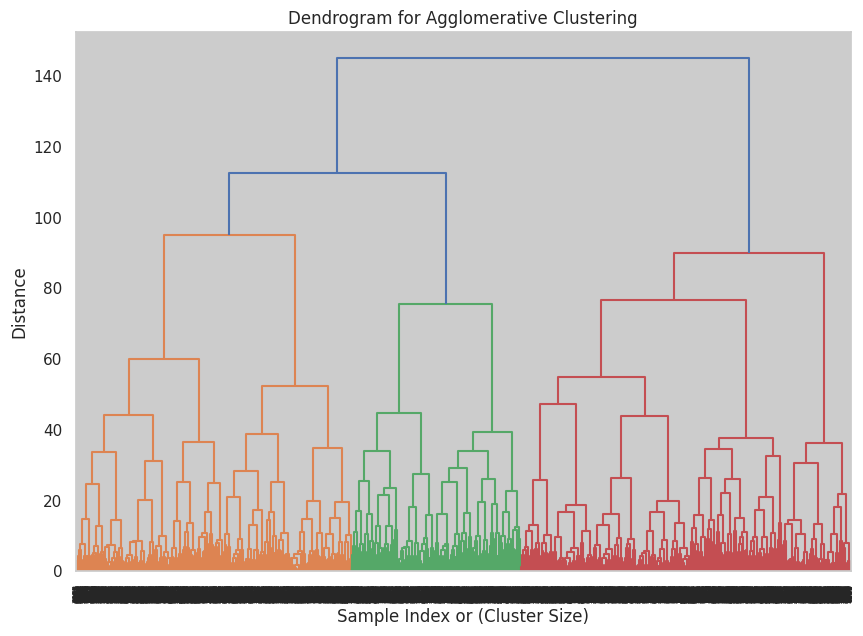

In [330]:
# Compute the linkage matrix
linked = linkage(X_scaled, method= 'ward')

# Plot the dendrogram
plt.figure(figsize= (10, 7))
dendrogram(linked,
           orientation= 'top',
           distance_sort= 'descending',
           show_leaf_counts= True)
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.title('Dendrogram for Agglomerative Clustering')
plt.show()

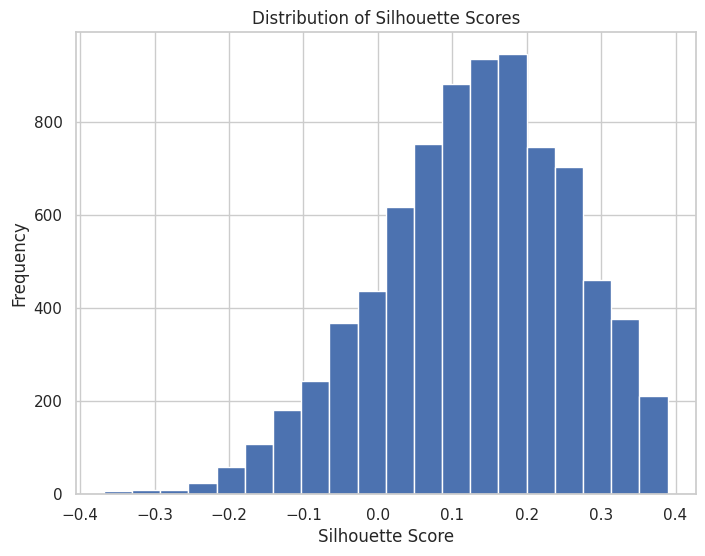

In [331]:
# Compute the silhouette scores for the chosen number of clusters
optimal_clusters = 4  # Example: Choose the optimal number of clusters
agglomerative = AgglomerativeClustering(n_clusters=optimal_clusters)
cluster_labels = agglomerative.fit_predict(X_scaled)
silhouette_vals = silhouette_samples(X_scaled, cluster_labels)

plt.figure(figsize= (8, 6))
plt.hist(silhouette_vals, bins= 20)
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.title('Distribution of Silhouette Scores')
plt.show()